# Setup
## Imports

In [1]:
%load_ext autoreload
%autoreload 2


In [ ]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import scipy

from generative_social_choice.utils.helper_functions import get_base_dir_path
from generative_social_choice.slates.voting_utils import gini
from generative_social_choice.ratings.utility_matrix import get_baseline_generate_slate_results
from generative_social_choice.utils.postprocessing import (
    scalar_utility_metrics,
    bootstrap_df_rows,
    plot_sorted_utility_distributions,
    plot_sorted_utility_CIs,
    clustered_barplot_with_error_bars, plot_scalar_clustered_confidence_intervals
)









# Embedding Ablation

## Multi-run

In [3]:
baseline_utilities, _ = get_baseline_generate_slate_results()
baseline_utilities.columns = pd.MultiIndex.from_product([
    ["Baseline Embedding"], 
    baseline_utilities.columns
])

baseline_utilities.head()

Baseline Embedding                                          \
                              0         1         2         3         4    
Voter                                                                      
generation1             3.652164  3.930224  3.419756  3.734451  3.674032   
generation10            3.996646  3.968564  3.995768  3.993362  3.995934   
generation100           3.871335  3.602703  3.935093  3.954936  3.935633   
generation11            3.996955  3.992691  3.996189  3.992591  3.996861   
generation12            3.389729  3.721042  3.505447  3.323329  3.832001   

                                                                           \
                     5         6         7         8         9         10   
Voter                                                                       
generation1    3.745700  3.820981  3.880952  3.752212  3.030603  3.661828   
generation10   3.989841  3.982060  3.991400  3.991635  3.986091  3.977244   
generation100  3.981460  3.931086  3.974949  3.974638  3.951919  3.833347   
generation11   3.998290  3.996564  3.993663  3.988286  3.990560  3.994410   
generation12   3.874439  3.926348  3.959825  3.533877  3.789801  3.742299   

                                                       
                     11        12        13        14  
Voter                                                  
generation1    3.873203  3.741641  3.885651  3.737227  
generation10   3.993327  3.992796  3.992937  3.991566  
generation100  3.973459  3.930262  3.744832  3.909553  
generation11   3.995822  3.997563  3.998377  3.992067  
generation12   3.964456  3.826039  3.779725  3.943519

In [4]:
baseline_utilities.isna().sum()

Baseline Embedding  0     0
                    1     0
                    2     0
                    3     0
                    4     0
                    5     0
                    6     0
                    7     0
                    8     0
                    9     0
                    10    0
                    11    0
                    12    0
                    13    0
                    14    0
dtype: int64

In [5]:
openai_embedding_utilities, _ = get_baseline_generate_slate_results(embedding_type="seed_statement")
openai_embedding_utilities.columns = pd.MultiIndex.from_product([
    ["OpenAI Embedding"], 
    openai_embedding_utilities.columns
])


openai_embedding_utilities.head()

OpenAI Embedding                                          \
                            0         1         2         3         4    
Voter                                                                    
generation1           3.898625  3.889442  3.849859  3.866531  3.875725   
generation10          3.990606  3.994331  3.988506  3.984539  3.978862   
generation100         3.872195  3.894820  3.969437  3.957064  3.847609   
generation11          3.996033  3.993444  3.995450  3.995308  3.995216   
generation12          3.950161  3.927704  3.845123  3.699785  3.829483   

                                                                           \
                     5         6         7         8         9         10   
Voter                                                                       
generation1    3.884814  3.888730  3.926437  3.702923  3.908730  3.911004   
generation10   3.993923  3.981263  3.983981  3.992733  3.994130  3.994777   
generation100  3.964658  3.987260  3.881054  3.945124  3.832208  3.731572   
generation11   3.995268  3.991671  3.990865  3.998637  3.992289  3.985426   
generation12   3.923565  3.597991  3.245304  3.904311  3.811111  3.549501   

                                                       
                     11        12        13        14  
Voter                                                  
generation1    3.909995  3.929690  3.847205  3.795804  
generation10   3.991748  3.984067  3.974623  3.941821  
generation100  3.865943  3.882379  3.930104  3.933105  
generation11   3.996081  3.997326  3.996422  3.994631  
generation12   3.168546  3.731311  3.952158  3.675798

In [6]:
all_multirun_utilities = pd.concat([
    baseline_utilities,
    openai_embedding_utilities
], axis=1)

(65.0, 100.0)

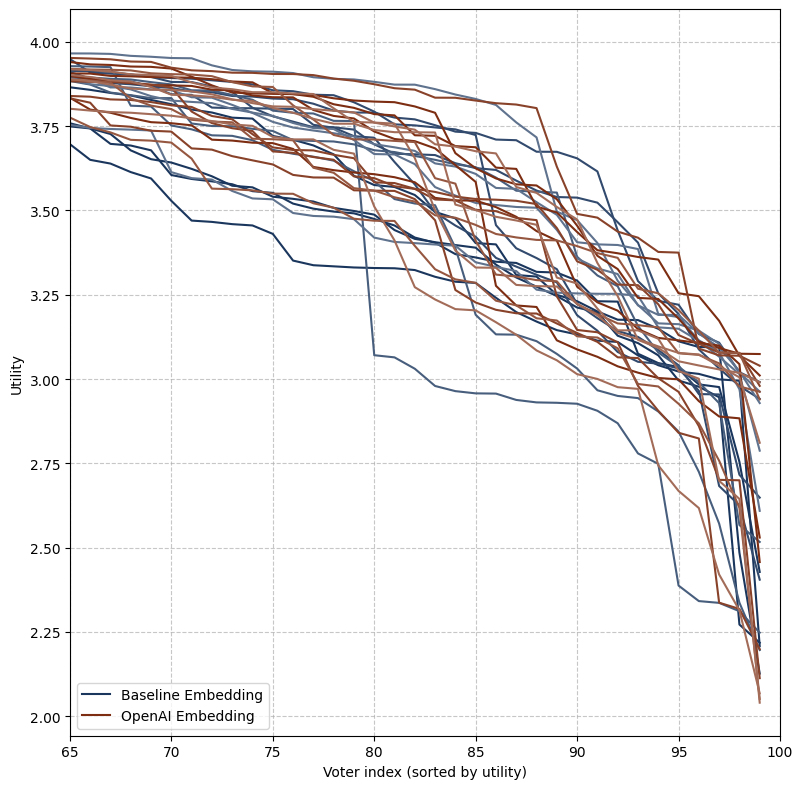

In [7]:
embedding_ablation_multi_fig = plot_sorted_utility_distributions(
    all_multirun_utilities.dropna(axis=1, how="any"),
    figsize=(8, 8)
)
embedding_ablation_multi_fig.axes[0].set_xlim(65, 100)


G:\Other computers\My Computer\NTFS\dev\generative_social_choice\generative_social_choice\utils\postprocessing.py:296: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for group_name, group_data in groups:


(50.0, 100.0)

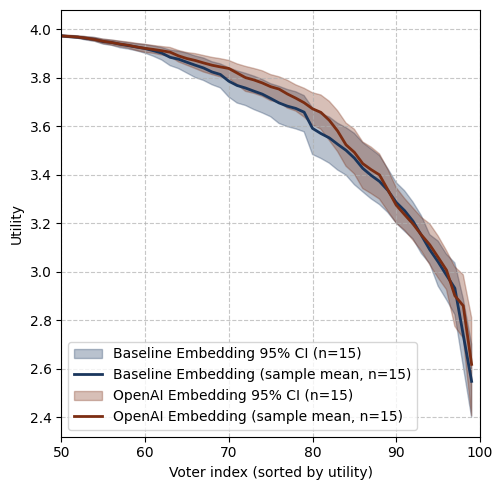

In [14]:
embedding_ablation_multi_fig = plot_sorted_utility_CIs(
    all_multirun_utilities.dropna(axis=1, how="any"),
    confidence_level=0.95,
    figsize=(5, 5),
)
embedding_ablation_multi_fig.axes[0].set_xlim(50, 100)

In [24]:
scalar_metrics_per_run = scalar_utility_metrics(all_multirun_utilities)
scalar_metrics_per_run

Mean  Mean of\nBottom 50%   Minimum  2*Mean Log  \
Baseline Embedding 0   3.752362             3.510129  2.217852    2.633562   
                   1   3.793090             3.596070  2.126395    2.656778   
                   2   3.757577             3.523384  2.427896    2.638694   
                   3   3.728445             3.463735  2.207554    2.620943   
                   4   3.866658             3.739093  2.991169    2.700934   
                   5   3.801209             3.610077  2.404961    2.661010   
                   6   3.829539             3.666530  2.648317    2.678048   
                   7   3.853367             3.715772  2.941274    2.693449   
                   8   3.759361             3.526513  2.196294    2.634345   
                   9   3.721605             3.449244  2.247758    2.607598   
                   10  3.819782             3.646931  2.516829    2.672900   
                   11  3.882337             3.769945  2.962672    2.708417   
                   12  3.831422             3.670025  2.928765    2.681429   
                   13  3.769321             3.545382  2.787602    2.646688   
                   14  3.835637             3.680788  2.609113    2.683355   
OpenAI Embedding   0   3.809875             3.625867  2.529911    2.666220   
                   1   3.861006             3.729562  3.010655    2.698049   
                   2   3.862189             3.732580  3.074265    2.698169   
                   3   3.800434             3.609988  2.457202    2.663484   
                   4   3.822024             3.650128  2.979752    2.676474   
                   5   3.889059             3.785415  3.039496    2.712841   
                   6   3.763429             3.533367  2.112853    2.638851   
                   7   3.780067             3.567315  2.198780    2.646767   
                   8   3.830190             3.666744  2.962403    2.679389   
                   9   3.816860             3.641170  2.939657    2.673630   
                   10  3.740567             3.487819  2.051185    2.626096   
                   11  3.736520             3.480126  2.067678    2.620132   
                   12  3.811174             3.630121  2.040068    2.665944   
                   13  3.823066             3.652573  2.811042    2.675121   
                   14  3.842460             3.693328  2.990629    2.687060   

                       Mean Log      Gini  
Baseline Embedding 0   1.316781  0.046244  
                   1   1.328389  0.039516  
                   2   1.319347  0.043713  
                   3   1.310472  0.049225  
                   4   1.350467  0.025128  
                   5   1.330505  0.039367  
                   6   1.339024  0.033449  
                   7   1.346724  0.027757  
                   8   1.317173  0.048092  
                   9   1.303799  0.057027  
                   10  1.336450  0.034673  
                   11  1.354208  0.023961  
                   12  1.340715  0.031347  
                   13  1.323344  0.041042  
                   14  1.341678  0.030518  
OpenAI Embedding   0   1.333110  0.037781  
                   1   1.349025  0.025974  
                   2   1.349084  0.026516  
                   3   1.331742  0.036381  
                   4   1.338237  0.032681  
                   5   1.356420  0.021602  
                   6   1.319425  0.045886  
                   7   1.323384  0.043518  
                   8   1.339694  0.033417  
                   9   1.336815  0.033456  
                   10  1.313048  0.048842  
                   11  1.310066  0.051996  
                   12  1.332972  0.037157  
                   13  1.337560  0.034695  
                   14  1.343530  0.029700

In [25]:
scalar_confidence_intervals = bootstrap_df_rows(scalar_metrics_per_run, confidence_level=0.95, n_bootstrap=400)
scalar_confidence_intervals

G:\Other computers\My Computer\NTFS\dev\generative_social_choice\generative_social_choice\utils\postprocessing.py:296: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for group_name, group_data in groups:


Mean  Mean of\nBottom 50%   Minimum  \
                   statistic                                              
Baseline Embedding lower bound  3.776664             3.560650  2.404455   
                   mean         3.800114             3.607574  2.547630   
                   upper bound  3.826904             3.661180  2.700613   
OpenAI Embedding   lower bound  3.787930             3.583064  2.396340   
                   mean         3.812595             3.632407  2.617705   
                   upper bound  3.833186             3.673501  2.827776   

                                2*Mean Log  Mean Log      Gini  
                   statistic                                    
Baseline Embedding lower bound    2.646928  1.323464  0.033025  
                   mean           2.661210  1.330605  0.038071  
                   upper bound    2.677343  1.338672  0.042617  
OpenAI Embedding   lower bound    2.653902  1.326951  0.031703  
                   mean           2.668549  1.334274  0.035974  
                   upper bound    2.681277  1.340638  0.040872

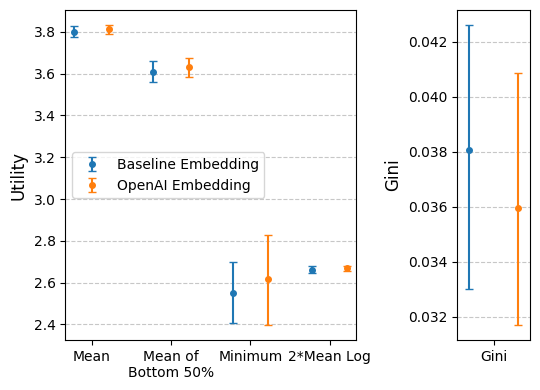

In [29]:
scalar_confidence_intervals_plot = plot_scalar_clustered_confidence_intervals(
    scalar_confidence_intervals.iloc[:,:-2],
    y_label="Utility",
    legend_loc="center left",
    fig_size=(5.5, 4),
    secondary_axis_df=scalar_confidence_intervals.iloc[:,[-1]],
    secondary_y_label="Gini"
)
# gini_ci_plot = plot_scalar_clustered_confidence_intervals(
#     scalar_confidence_intervals.iloc[:,[3]],
#     y_label="Gini",
#     legend_loc="best",
#     # fig_size=(2, 2)
# )